<a href="https://colab.research.google.com/github/sarikasea/Finance-Notebooks/blob/main/AML_%26_Compliance_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries and Data

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_style("whitegrid")

In [ ]:
# Set plot style
sns.set_style("whitegrid")

# Define file paths
kyc_file = 'clients.csv'
transactions_file = 'transactions.csv'

# Load data
kyc_df = pd.read_csv(kyc_file)
transactions_df = pd.read_csv(transactions_file)

# Preview data
print("KYC Data:")
display(kyc_df.head())

print("Transactions Data:")
display(transactions_df.head())

KYC Data:


,client_id,client_name,client_type,sector,sector_risk,country,pep_flag,sanctions_flag,fatf_country_flag,ofac_country_flag,sectoral_sanctions_flag,ownership_opacity_score
0,1,Wells-Turner,Financial Institution,NGO/Charity,High,JP,0,0,0,0,0,0.0
1,2,"Goodman, Hendrix and Garcia",Financial Institution,Import/Export,Medium,CH,0,0,0,0,0,0.0
2,3,Phillips-Hanson,NGO,NGO/Charity,High,AE,0,1,0,0,0,0.5
3,4,"Kim, Anderson and Espinoza",Financial Institution,Defense/Arms,High,RU,1,0,0,1,1,0.0
4,5,Marks-Thompson,Financial Institution,Financial Services,Medium,AU,0,0,0,0,1,0.0


Transactions Data:


,transaction_id,client_id,amount,transaction_type,timestamp,client_country,counterparty_country,ofac_match_flag,fatf_country_flag,structuring_pattern_flag,rapid_movement_flag,trade_mispricing_flag
0,1,1412,1027.64,Check,2025-08-20 09:21:56,IN,SG,0,0,0,0,0
1,2,1035,518.82,SWIFT,2025-09-07 07:52:58,RU,NL,0,0,0,0,0
2,3,704,460.78,SWIFT,2025-09-28 03:00:43,LB,IN,0,0,0,0,0
3,4,1073,1625.76,Wire,2025-08-22 04:57:11,AE,CA,0,0,0,0,0
4,5,1622,1856.47,SWIFT,2025-08-07 19:49:50,CH,IN,0,0,0,0,0


## Step 2: Data Cleaning

In [ ]:
# Check for missing values
print("KYC missing values:\n", kyc_df.isnull().sum())
print("Transactions missing values:\n", transactions_df.isnull().sum())

# Check for duplicates
print("KYC duplicates:", kyc_df.duplicated().sum())
print("Transactions duplicates:", transactions_df.duplicated().sum())

# Check data types
print(kyc_df.dtypes)
print(transactions_df.dtypes)

KYC missing values:
 client_id                  0
client_name                0
client_type                0
sector                     0
sector_risk                0
country                    0
pep_flag                   0
sanctions_flag             0
fatf_country_flag          0
ofac_country_flag          0
sectoral_sanctions_flag    0
ownership_opacity_score    0
dtype: int64
Transactions missing values:
 transaction_id              0
client_id                   0
amount                      0
transaction_type            0
timestamp                   0
client_country              0
counterparty_country        0
ofac_match_flag             0
fatf_country_flag           0
structuring_pattern_flag    0
rapid_movement_flag         0
trade_mispricing_flag       0
dtype: int64
KYC duplicates: 0
Transactions duplicates: 0
client_id                    int64
client_name                 object
client_type                 object
sector                      object
sector_risk                 ob

## Step 3: Risk Flags

In [ ]:
# Clients risk flags
risk_flags = ['pep_flag', 'sanctions_flag', 'fatf_country_flag', 'ofac_country_flag', 'sectoral_sanctions_flag']
kyc_df[risk_flags].sum()



,0
pep_flag,114
sanctions_flag,55
fatf_country_flag,179
ofac_country_flag,601
sectoral_sanctions_flag,575


In [ ]:
# Transactions risk flags
tx_risk_flags = ['ofac_match_flag', 'fatf_country_flag', 'structuring_pattern_flag', 'rapid_movement_flag', 'trade_mispricing_flag']
transactions_df[tx_risk_flags].sum()

,0
ofac_match_flag,1790
fatf_country_flag,602
structuring_pattern_flag,347
rapid_movement_flag,2460
trade_mispricing_flag,10


## Visualizing Transaction Sources

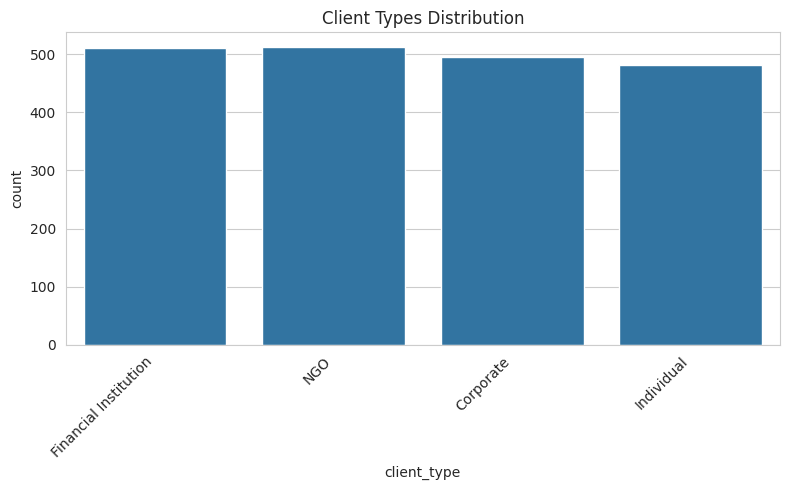

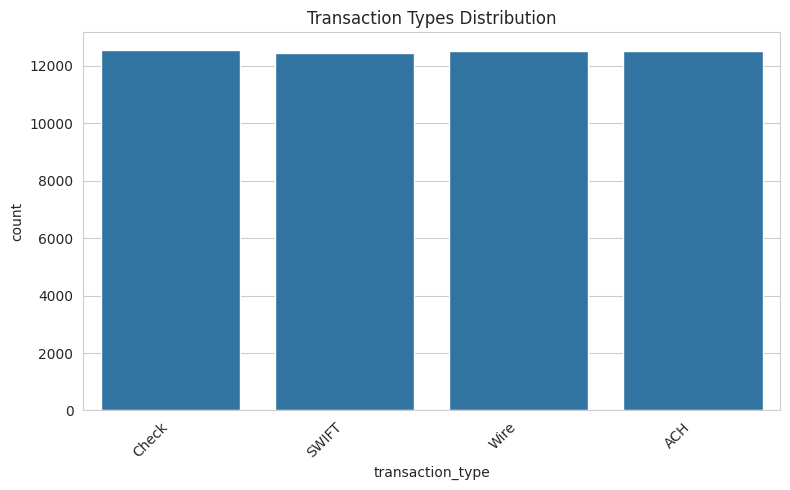

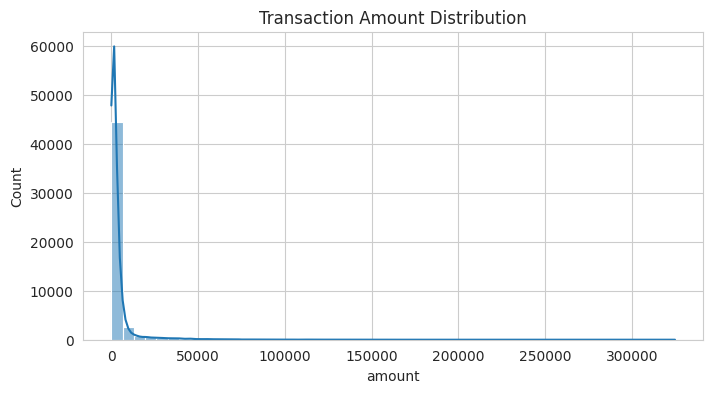

In [ ]:
# Distribution of clients by type
plt.figure(figsize=(8,5))
sns.countplot(x='client_type', data=kyc_df)
plt.title('Client Types Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Transactions by type
plt.figure(figsize=(8,5))
sns.countplot(x='transaction_type', data=transactions_df)
plt.title('Transaction Types Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Transaction amounts histogram
plt.figure(figsize=(8,4))
sns.histplot(transactions_df['amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

## Calculating High Risk Clients Based on High Risk Flags

In [ ]:
# High-risk clients (PEP or sanctioned)
high_risk_clients = kyc_df[(kyc_df['pep_flag']==1) | (kyc_df['sanctions_flag']==1)]
print("Number of high-risk clients:", high_risk_clients.shape[0])

# Transactions involving high-risk countries
high_risk_tx = transactions_df[(transactions_df['ofac_match_flag']==1) | (transactions_df['fatf_country_flag']==1)]
print("Number of high-risk transactions:", high_risk_tx.shape[0])

Number of high-risk clients: 164
Number of high-risk transactions: 1790


In [ ]:
https://github.com/bhatnagaraashish/KYC_AML_Compliance_Data_Analysis/blob/main/AML_KYC_Project.ipynb

In [ ]:
# Merge transaction data with client info
merged = transactions_df.merge(kyc_df, on='client_id', how='left')
merged.head()

,transaction_id,client_id,amount,transaction_type,timestamp,client_country,counterparty_country,ofac_match_flag,fatf_country_flag_x,structuring_pattern_flag,...,client_type,sector,sector_risk,country,pep_flag,sanctions_flag,fatf_country_flag_y,ofac_country_flag,sectoral_sanctions_flag,ownership_opacity_score
0,1,1412,1027.64,Check,2025-08-20 09:21:56,IN,SG,0,0,0,...,Financial Institution,Crypto Exchange,High,IN,0,0,0,0,0,0.0
1,2,1035,518.82,SWIFT,2025-09-07 07:52:58,RU,NL,0,0,0,...,Financial Institution,Tech,Low,RU,0,0,0,1,0,0.0
2,3,704,460.78,SWIFT,2025-09-28 03:00:43,LB,IN,0,0,0,...,Financial Institution,Retail,Low,LB,0,0,0,0,0,0.0
3,4,1073,1625.76,Wire,2025-08-22 04:57:11,AE,CA,0,0,0,...,Corporate,NGO/Charity,High,AE,1,0,0,0,0,0.5
4,5,1622,1856.47,SWIFT,2025-08-07 19:49:50,CH,IN,0,0,0,...,Financial Institution,Real Estate,Medium,CH,0,0,0,0,0,0.0


In [ ]:
merged.shape

(50000, 23)

## Basic Analysis

In [ ]:

# Number of transactions per client
txn_count = merged.groupby("client_id")["transaction_id"].count()
print("Transactions per client:\n", txn_count)

# Total transaction amount per client
total_amount = merged.groupby("client_id")["amount"].sum()
print("Total transaction amount per client:\n", total_amount)

Transactions per client:
 client_id
1       26
2       28
3       25
4       29
5       22
        ..
1996    30
1997    27
1998    21
1999    23
2000    19
Name: transaction_id, Length: 2000, dtype: int64
Total transaction amount per client:
 client_id
1       261181.94
2        59430.99
3        61924.06
4       210226.50
5        61420.28
          ...    
1996    155965.31
1997     80417.33
1998     86962.37
1999    185571.55
2000     44357.11
Name: amount, Length: 2000, dtype: float64


## Flag High-Risk / PEP Clients

In [ ]:
# PEP flagged clients
pep_clients = merged[merged['pep_flag'] == 1]
print("PEP clients:")
display(pep_clients)

PEP clients:


,transaction_id,client_id,amount,transaction_type,timestamp,client_country,counterparty_country,ofac_match_flag,fatf_country_flag_x,structuring_pattern_flag,...,client_type,sector,sector_risk,country,pep_flag,sanctions_flag,fatf_country_flag_y,ofac_country_flag,sectoral_sanctions_flag,ownership_opacity_score
3,4,1073,1625.76,Wire,2025-08-22 04:57:11,AE,CA,0,0,0,...,Corporate,NGO/Charity,High,AE,1,0,0,0,0,0.5
23,24,1877,5304.83,SWIFT,2025-07-22 10:11:57,VE,IN,0,0,0,...,Individual,Crypto Exchange,High,VE,1,0,0,1,0,0.0
40,41,500,4043.03,Check,2025-09-24 01:17:21,CA,UK,0,0,0,...,Financial Institution,Casino/Gambling,High,CA,1,0,0,0,0,0.0
43,44,1944,1304.17,SWIFT,2025-07-09 12:17:03,UK,AU,0,0,0,...,Financial Institution,Defense/Arms,High,UK,1,0,0,0,1,0.0
58,59,1262,10544.14,Check,2025-07-16 01:58:43,IN,AU,0,0,0,...,NGO,Retail,Low,IN,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49928,49929,954,3403.94,Check,2025-08-22 01:28:43,AF,UK,0,0,0,...,Financial Institution,Defense/Arms,High,AF,1,0,0,0,1,0.0
49943,49944,1875,229.01,Wire,2025-09-30 09:00:57,IR,US,0,0,0,...,Corporate,Financial Services,Medium,IR,1,0,1,1,1,0.0
49953,49954,891,1277.28,Check,2025-07-05 20:14:46,AF,UK,0,0,0,...,Financial Institution,NGO/Charity,High,AF,1,0,0,0,0,0.0
49961,49962,1361,60123.31,Check,2025-07-24 08:30:13,IN,KP,1,1,0,...,Financial Institution,Financial Services,Medium,IN,1,0,0,0,1,0.0


## Visualisation 1: PEP Clients by country

This graph specifically shows the distribution of clients who have been flagged as PEP (Politically Exposed Person) across different countries. Each bar represents a country, and the length of the bar indicates the number of PEP flagged clients from that country in your dataset. Looking at the bar lengths, you can see which countries have the highest and lowest number of PEP clients. For example, based on the plot, the top 5 countries with most PEP clients are Iran, Belgium, France, Bigeria, and China

 This visualization helps to highlight the geographical concentration of PEP clients within your customer base.

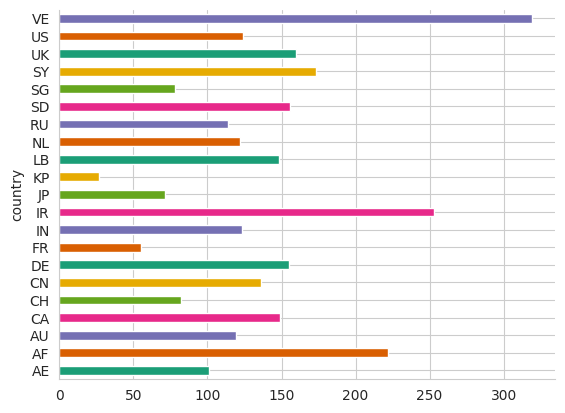

In [ ]:
# @title customer_country

from matplotlib import pyplot as plt
import seaborn as sns
pep_clients.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(merged.columns)

Index(['transaction_id', 'client_id', 'amount', 'transaction_type',
       'timestamp', 'client_country', 'counterparty_country',
       'ofac_match_flag', 'fatf_country_flag_x', 'structuring_pattern_flag',
       'rapid_movement_flag', 'trade_mispricing_flag', 'client_name',
       'client_type', 'sector', 'sector_risk', 'country', 'pep_flag',
       'sanctions_flag', 'fatf_country_flag_y', 'ofac_country_flag',
       'sectoral_sanctions_flag', 'ownership_opacity_score'],
      dtype='object')


## Visualization 2 Sector Risk Analysis

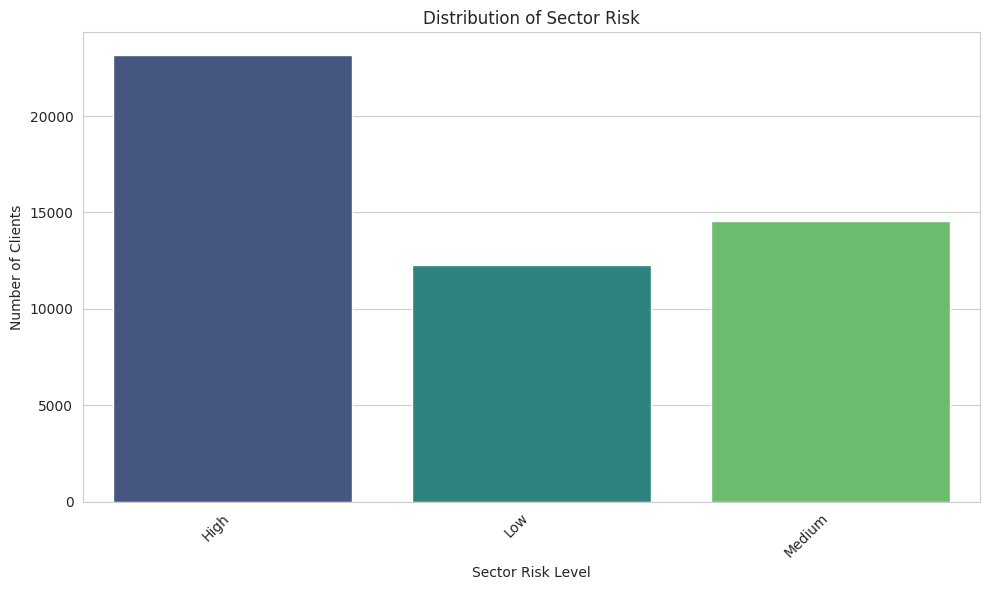

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sector_risk', data=merged, palette='viridis', hue='sector_risk', legend=False)
plt.title('Distribution of Sector Risk')
plt.xlabel('Sector Risk Level')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Group and count transactions by sector and sector risk

### Subtask:
Group the 'merged' DataFrame by 'sector' and 'sector_risk' and count the number of transactions for each group.


In [ ]:
grouped_transactions = merged.groupby(['sector', 'sector_risk'])['transaction_id'].count().reset_index()
grouped_transactions.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)
print("Transactions grouped by sector and sector risk:")
display(grouped_transactions.head())

Transactions grouped by sector and sector risk:


,sector,sector_risk,transaction_count
0,Casino/Gambling,High,4556
1,Consulting,Low,4206
2,Crypto Exchange,High,4382
3,Defense/Arms,High,4751
4,Energy/Oil,High,4735


**Reasoning**:
The subtask is to create a bar chart displaying the number of transactions per sector, differentiated by 'sector_risk'. The `grouped_transactions` DataFrame, which contains the necessary data, has already been created. I will use Seaborn's `barplot` function to visualize this data.



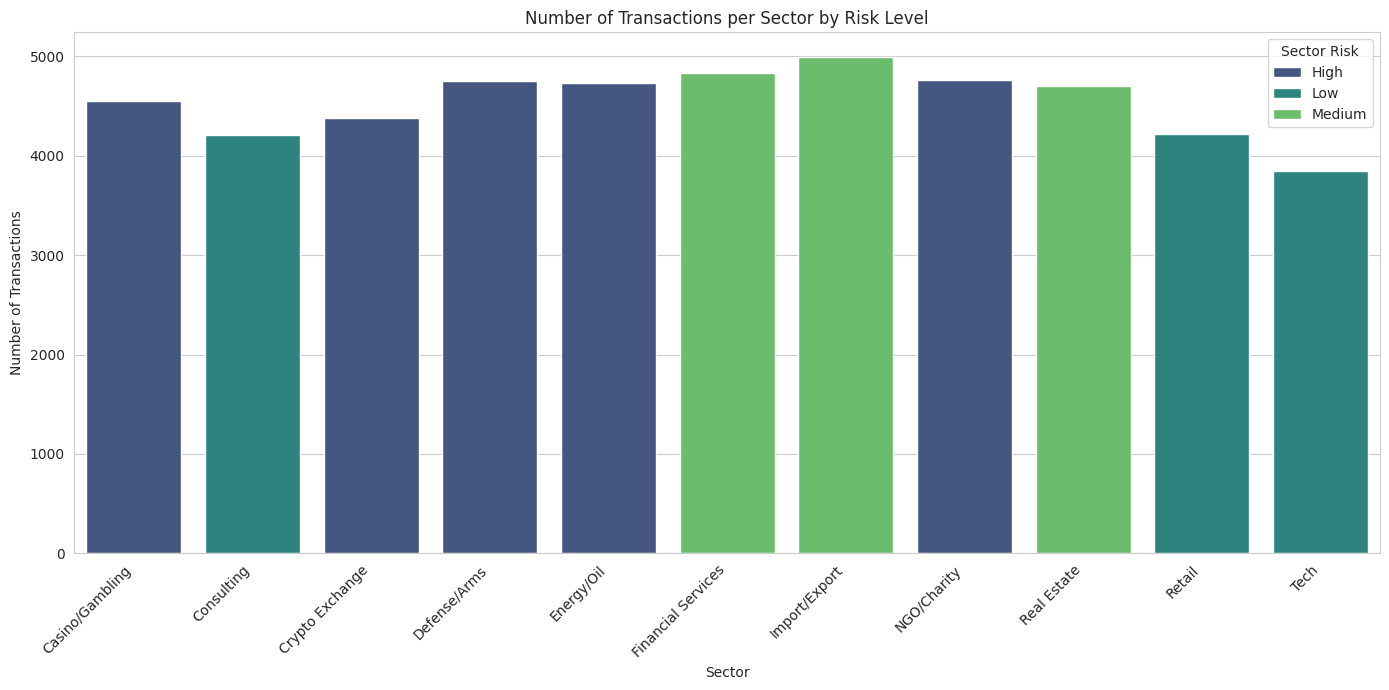

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x='sector', y='transaction_count', hue='sector_risk', data=grouped_transactions, palette='viridis')
plt.title('Number of Transactions per Sector by Risk Level')
plt.xlabel('Sector')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sector Risk')
plt.tight_layout()
plt.show()

## Sector Risk Summary:

### Q&A
The bar chart visualizes the distribution of transaction counts across different sectors, categorized by their associated risk levels. Key observations reveal that several high-risk sectors, such as Defense/Arms (4751 transactions), Energy/Oil (4735 transactions), Casino/Gambling (4556 transactions), and Crypto Exchange (4382 transactions), exhibit significant transaction volumes. Notably, the low-risk Consulting sector also shows a substantial transaction count (4206 transactions), comparable to some high-risk categories. This indicates that high transaction volume is not solely confined to high-risk sectors.

### Data Analysis Key Findings
*   The 'Defense/Arms' sector, classified as 'High' risk, recorded the highest transaction count among the previewed data, with 4751 transactions.
*   Other 'High' risk sectors, including 'Energy/Oil' (4735 transactions), 'Casino/Gambling' (4556 transactions), and 'Crypto Exchange' (4382 transactions), also demonstrated substantial transaction volumes.
*   The 'Consulting' sector, categorized as 'Low' risk, showed a considerable transaction count of 4206, which is notably comparable to the volumes observed in several 'High' risk sectors.

### Insights or Next Steps
*   The substantial transaction volumes in both high-risk sectors (like Defense/Arms, Energy/Oil) and a notable low-risk sector (Consulting) suggest that transaction count alone is not a definitive indicator of risk, and sector-specific risk categorization remains crucial for assessment.
*   Further investigation into the nature and value of transactions within these high-volume sectors, especially the high-risk ones, could provide deeper insights into potential financial crime risks or compliance challenges.


## Calculate 'Risk Rating' column

In [ ]:
def calculate_client_risk_rating(row):
    # Rule 1: Immediate High Risk from direct flags
    if (row['sanctions_flag'] == 1 or
        row['pep_flag'] == 1 or
        row['ofac_country_flag'] == 1 or
        row['fatf_country_flag_y'] == 1 or # from kyc_df
        row['sectoral_sanctions_flag'] == 1):
        return 'High'

    # Rule 2: High Risk based on Sector Risk
    # This is an existing categorical risk assessment
    if row['sector_risk'] == 'High':
        return 'High'

    # Rule 3: Medium Risk based on Sector Risk
    if row['sector_risk'] == 'Medium':
        return 'Medium'

    # Rule 4: Medium Risk based on high ownership opacity (if not already High)
    # A score > 0.75 indicates higher opacity, suggesting potential medium risk
    if row['ownership_opacity_score'] > 0.75:
        return 'Medium'

    # Rule 5: Otherwise, Low Risk
    return 'Low'

# Apply the new risk rating function to the merged DataFrame
merged['client_risk_rating'] = merged.apply(calculate_client_risk_rating, axis=1)

print("Client Risk Rating distribution:")
display(merged['client_risk_rating'].value_counts())

Client Risk Rating distribution:


,count
client_risk_rating,
High,35679
Low,7881
Medium,6440


## Transaction Amount by Risk Rating

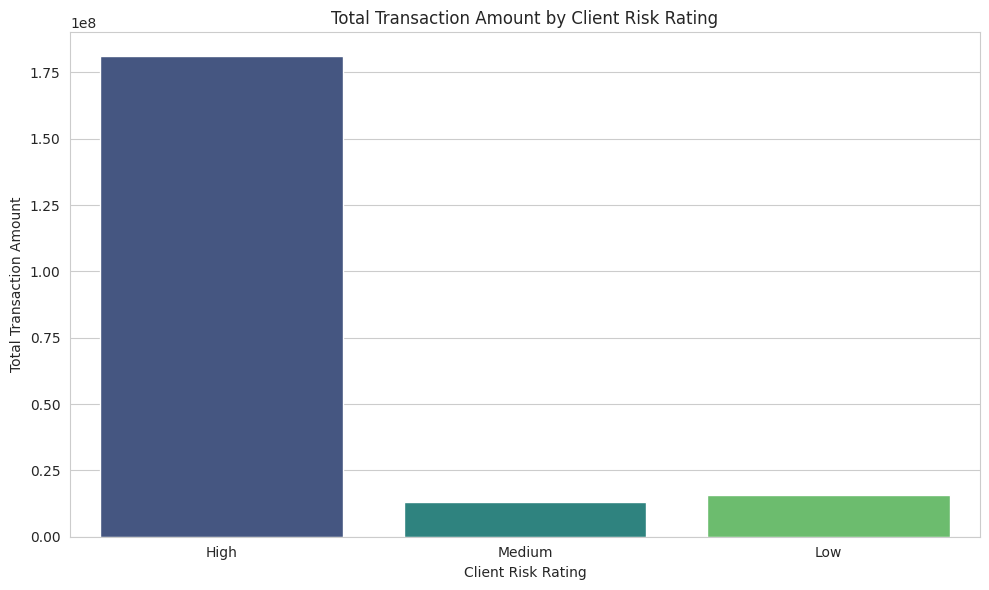

In [ ]:
# Calculate total transaction amount by client risk rating
risk_amount_summary = merged.groupby('client_risk_rating')['amount'].sum().reset_index()

# Sort the risk categories for better visualization (e.g., High, Medium, Low)
# Define the order of risk categories
risk_order = ['High', 'Medium', 'Low']
risk_amount_summary['client_risk_rating'] = pd.Categorical(risk_amount_summary['client_risk_rating'], categories=risk_order, ordered=True)
risk_amount_summary = risk_amount_summary.sort_values('client_risk_rating')

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='client_risk_rating', y='amount', data=risk_amount_summary, palette='viridis', hue='client_risk_rating', legend=False)
plt.title('Total Transaction Amount by Client Risk Rating')
plt.xlabel('Client Risk Rating')
plt.ylabel('Total Transaction Amount')
plt.tight_layout()
plt.show()

## Transaction Type by Risk Rating

In [ ]:
grouped_by_risk_type = merged.groupby(['client_risk_rating', 'transaction_type'])['transaction_id'].count().reset_index()
grouped_by_risk_type.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)
print("Transactions grouped by client risk rating and transaction type:")
display(grouped_by_risk_type.head())

Transactions grouped by client risk rating and transaction type:


,client_risk_rating,transaction_type,transaction_count
0,High,ACH,8878
1,High,Check,8963
2,High,SWIFT,8883
3,High,Wire,8955
4,Low,ACH,1991


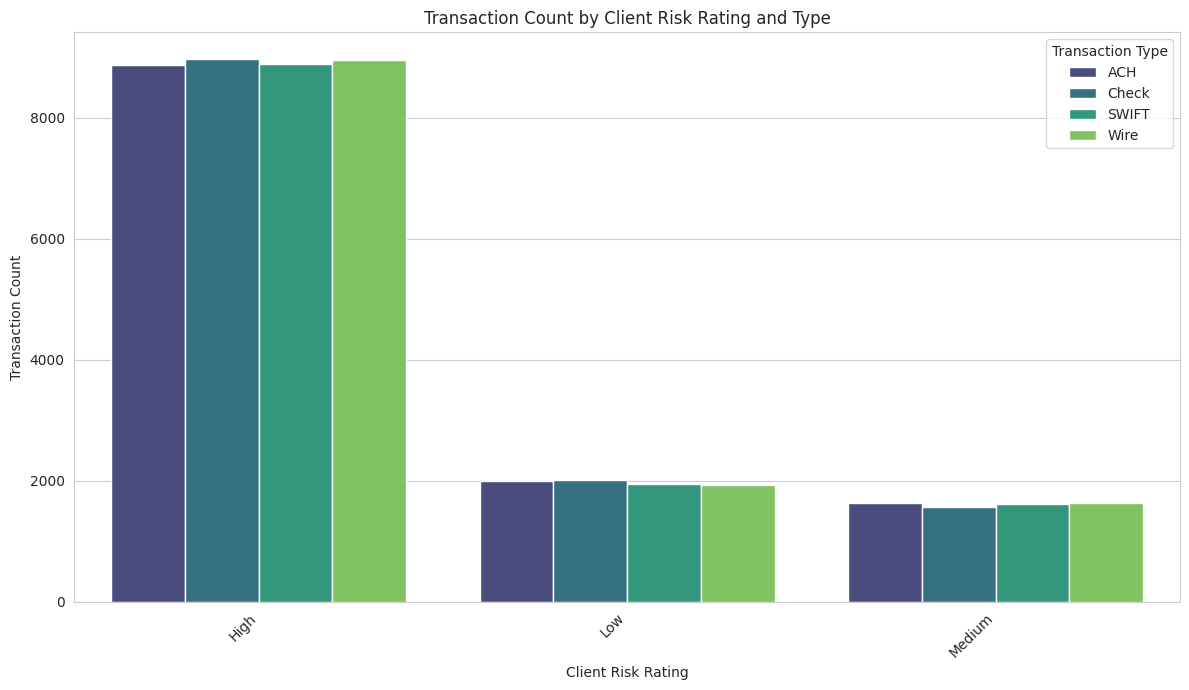

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='client_risk_rating', y='transaction_count', hue='transaction_type', data=grouped_by_risk_type, palette='viridis')
plt.title('Transaction Count by Client Risk Rating and Type')
plt.xlabel('Client Risk Rating')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The transactions were successfully grouped by client risk rating and transaction type, and the count of transactions for each combination was determined.
*   For 'High' risk clients, the transaction counts by type were: ACH (8878), Check (8963), SWIFT (8883), and Wire (8955).
*   For 'Low' risk clients, at least for the ACH transaction type, the count was 1991.
*   A bar plot was generated to visualize the transaction counts across different risk ratings and transaction types, which displayed the data as grouped bars rather than the initially requested stacked bars.

### Insights or Next Steps

*   The distribution of transaction types appears relatively even across 'High' risk clients, suggesting a diversified use of transaction methods within this risk category.
*   To fully meet the initial visualization objective, the next step should be to create a stacked bar plot to more clearly show the proportion of each transaction type within each client risk rating.


## Distribution of Risk Ratings by Country

In [ ]:
# Group data by country and client_risk_rating and count transactions
grouped_by_country_risk = merged.groupby(['country', 'client_risk_rating']).size().unstack(fill_value=0)

# Ensure the risk categories are in a desired order for plotting
risk_order = ['High', 'Medium', 'Low']
grouped_by_country_risk = grouped_by_country_risk.reindex(columns=risk_order, fill_value=0)

print("Transactions grouped by country and client risk rating:")
display(grouped_by_country_risk.head())

Transactions grouped by country and client risk rating:


client_risk_rating,High,Medium,Low
country,,,
AE,1393,379,410
AF,1436,436,555
AU,1229,602,640
CA,1506,421,634
CH,1645,608,465


Plot saved to plots/risk_ratings_by_country_stacked_bar.png


<Figure size 1600x800 with 0 Axes>

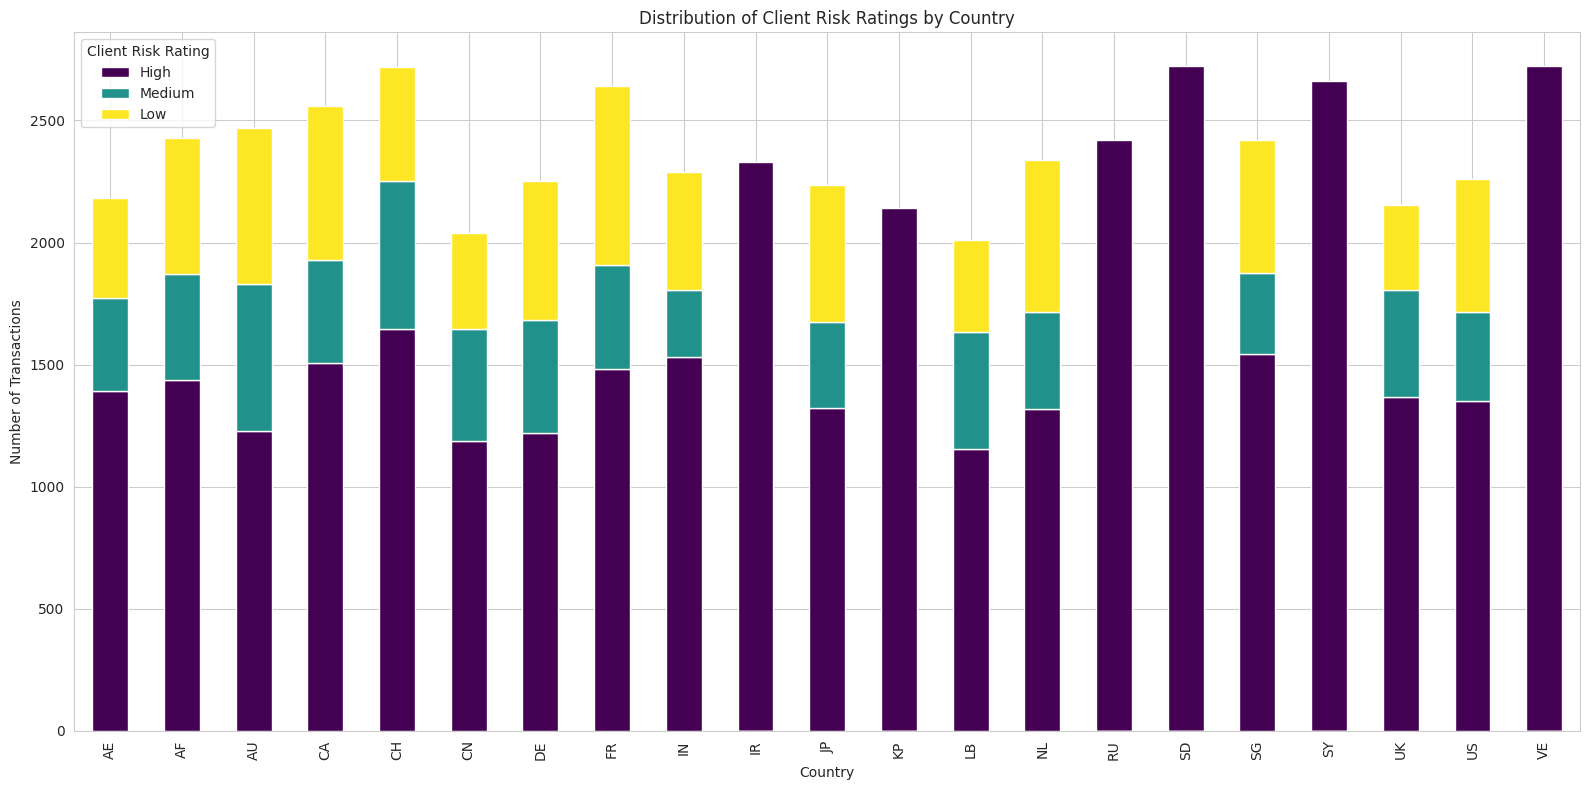

In [ ]:
# Create the stacked bar plot
plt.figure(figsize=(16, 8))
grouped_by_country_risk.plot(kind='bar', stacked=True, figsize=(16, 8), cmap='viridis')
plt.title('Distribution of Client Risk Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.legend(title='Client Risk Rating')
plt.tight_layout()

# Define the directory to save the plot
output_dir = 'plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the plot to a file
plot_path = os.path.join(output_dir, 'risk_ratings_by_country_stacked_bar.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()